In [2]:
import os, sys, pickle
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from random import randint
from shared.autoencoderHelpers import read_n_images, generate_img_from_folder, get_input_shape, get_num_examples, plot_history, get_images, bgr2rgb, plot_reconstruction
DATA_DIR = '../data'

In [3]:
def loadModel(configName):
    path = '../models/autoencoder/'+configName+'/'
    modelPath = path + 'model'
    historyPath = path +'history.pickle'
    
    model = tf.keras.models.load_model(modelPath)
    with open(historyPath, 'rb') as f:
        history = pickle.load(f)
        
    return (model,history)

In [16]:
def showHistory(history):
    loss = history['loss']
    val_loss = history['val_loss']
    #mse = history['mean_squared_error']
    #val_mse = history['val_mean_squared_error']
    plt.plot(loss, label='Training')
    plt.plot(val_loss, label='Validation')
    plt.title('Training Loss')
    plt.ylabel('Loss (MSE)')
    plt.xlabel('Epoc')
    plt.legend()
    plt.show()
    #plt.plot(mse)
    #plt.plot(val_mse)
    #plt.show()
    

In [6]:
def evaluateModel(model):
    # load data and run evalutation
    BATCH_SIZE_TEST = 32
    NUM_SAMPLES_TEST = get_num_examples(DATA_DIR, 'test')
    STEPS_TEST = ceil(NUM_SAMPLES_TEST/BATCH_SIZE_TEST)
    results =model.evaluate_generator(generate_img_from_folder(DATA_DIR, 'test', BATCH_SIZE_TEST),steps=STEPS_TEST)
    print('test loss ',results[0])
    print('test mse ', results[1])
    decoded_imgs = model.predict_generator(generate_img_from_folder(DATA_DIR, 'test', BATCH_SIZE_TEST),steps=1)
    return decoded_imgs

def showImages(images):
    num_images = 5
    idxs = [randint(0, 31) for i in range(num_images)]
    plot_reconstruction(images, DATA_DIR, 'test', idxs)


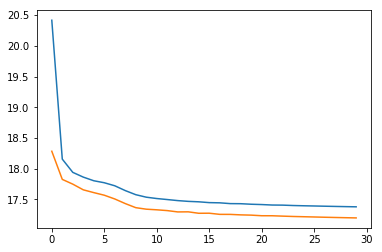

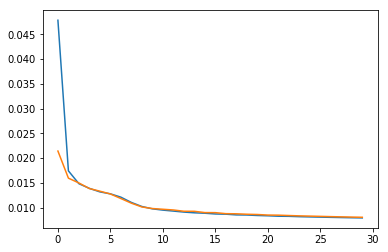

test loss  17.06421964308795
test mse  0.007662419


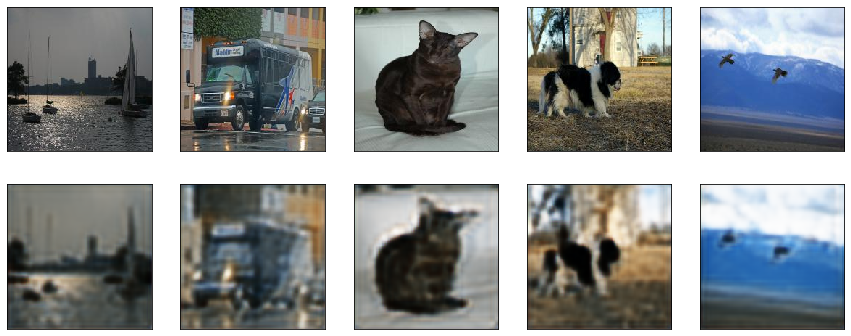

In [43]:
(model,history)=loadModel('config1')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

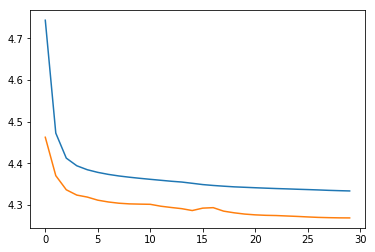

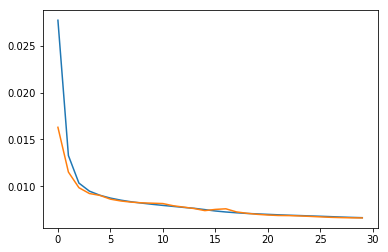

test loss  16.95016075583065
test mse  0.0063522747


IndexError: index 32 is out of bounds for axis 0 with size 32

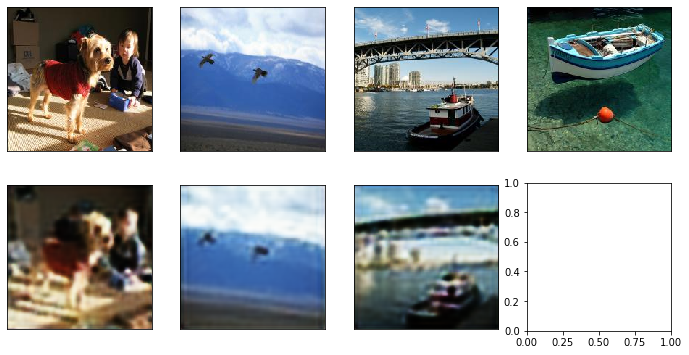

In [44]:
(model,history)=loadModel('config2')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

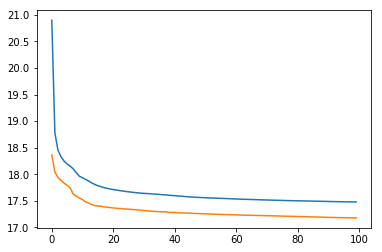

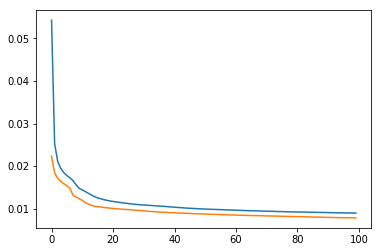

test loss  17.04378055123722
test mse  0.0074807894


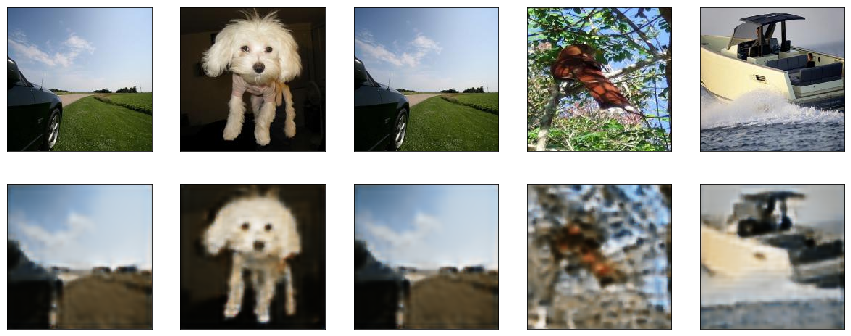

In [46]:
(model,history)=loadModel('config3')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

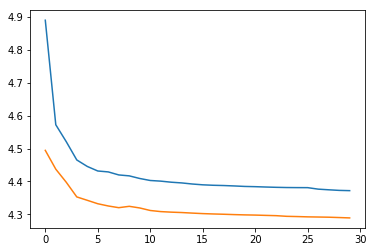

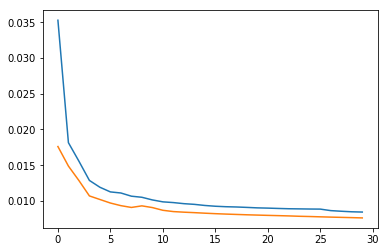

test loss  17.025106822743137
test mse  0.0072717904


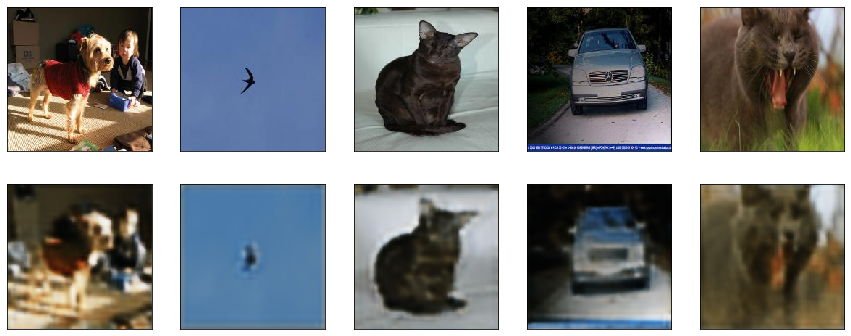

In [47]:
(model,history)=loadModel('config4')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

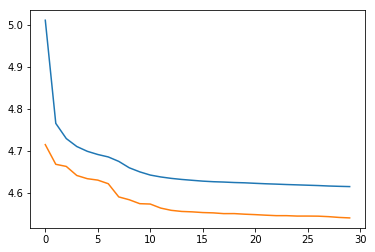

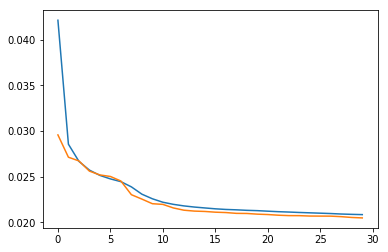

test loss  18.048883213716394
test mse  0.020325994


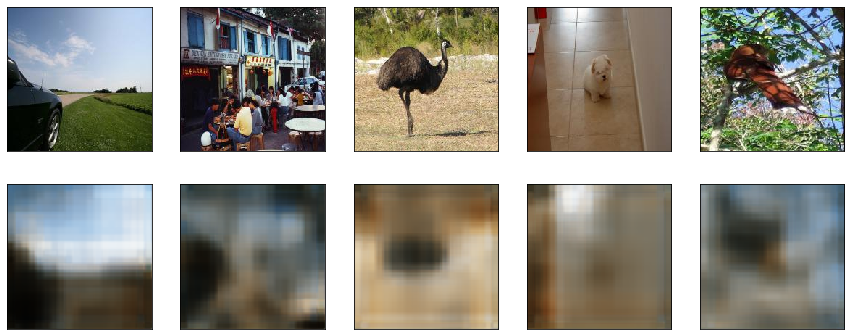

In [49]:
(model,history)=loadModel('config5')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

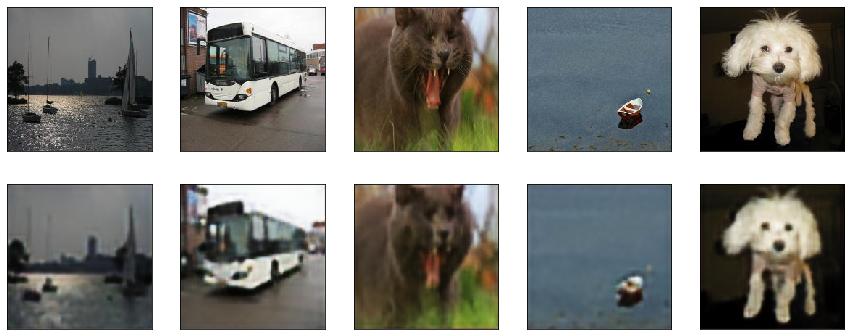

In [61]:
showImages(decoded_images)

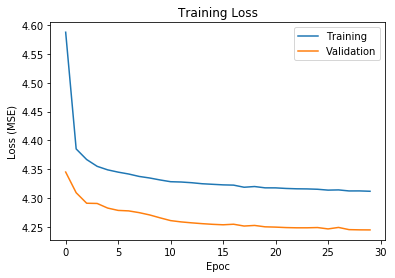

test loss  15.43606432278951
test mse  0.0039420566


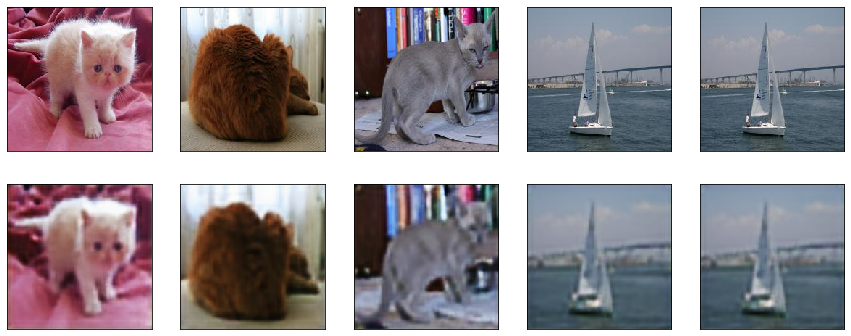

In [19]:
(model,history)=loadModel('config6')
showHistory(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

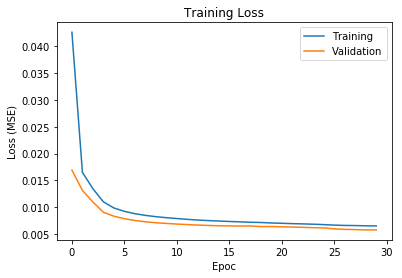

{'loss': [0.042654446240227954, 0.016511836418738733, 0.013443959490037882, 0.01100198132200883, 0.009858254414911453, 0.00922789048546782, 0.008794667313878353, 0.00847730221799933, 0.00823161297549422, 0.008043232810898469, 0.007885071198241068, 0.007737142069695087, 0.00760470384445328, 0.0075060042158628885, 0.007418535671268518, 0.00734006381378724, 0.0072719188657804175, 0.007196872348252397, 0.00714830168379614, 0.007057997021967402, 0.006998779259335536, 0.00693880608305335, 0.006887119503405231, 0.006827551384384816, 0.006751112575427844, 0.006658625280341277, 0.006600643457988134, 0.0065769224069439445, 0.006528906835816227, 0.006511415516097958], 'binary_crossentropy': [0.6231402, 0.5634703, 0.55548906, 0.54927075, 0.54621166, 0.5445039, 0.54331255, 0.54242843, 0.54176426, 0.5412597, 0.5408379, 0.5404454, 0.54009527, 0.5398296, 0.5395946, 0.53938204, 0.5391949, 0.5389753, 0.5388414, 0.53858286, 0.53841317, 0.53824353, 0.53809696, 0.5379266, 0.5376763, 0.5373888, 0.5372129, 0

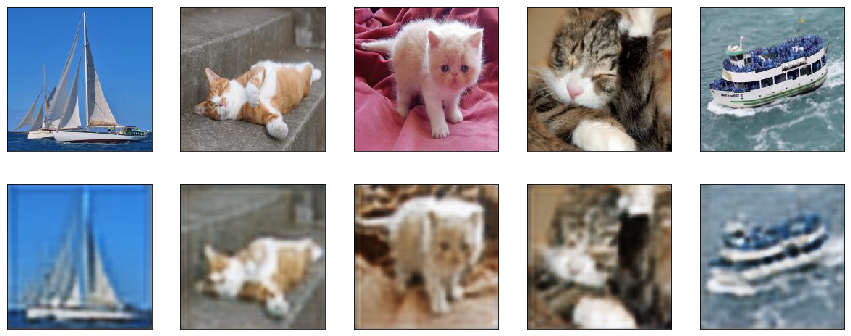

In [23]:
(model,history)=loadModel('twoClassTest')
showHistory(history)
print(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

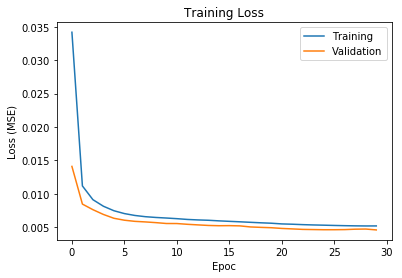

{'loss': [0.0341867274676378, 0.011182511404443245, 0.009125771258886044, 0.008142658996467407, 0.007471101781210074, 0.00704380556797752, 0.006762329940325939, 0.006578464766677755, 0.006463658462206904, 0.006378557382581326, 0.0062827510544313835, 0.00616757831034752, 0.006094517691347462, 0.006043012390056481, 0.005955097910303336, 0.0058829600206361365, 0.005813904686902578, 0.005737970257177949, 0.00566419203264209, 0.0056006440713715095, 0.005496764720345919, 0.005451268151115913, 0.00538904145001792, 0.005342706511370265, 0.0053073531912209895, 0.005267602473927232, 0.005233999581720966, 0.005207514390349388, 0.005191563123550552, 0.005196480549728641], 'binary_crossentropy': [0.60432273, 0.54967535, 0.544321, 0.54160464, 0.5397516, 0.5385722, 0.53776735, 0.5372268, 0.5368946, 0.53665185, 0.53637975, 0.5360392, 0.5358436, 0.53571147, 0.535464, 0.535271, 0.5350825, 0.534871, 0.53465617, 0.5344872, 0.5341977, 0.53407854, 0.53389686, 0.5337712, 0.5336721, 0.53355706, 0.53346074, 0.

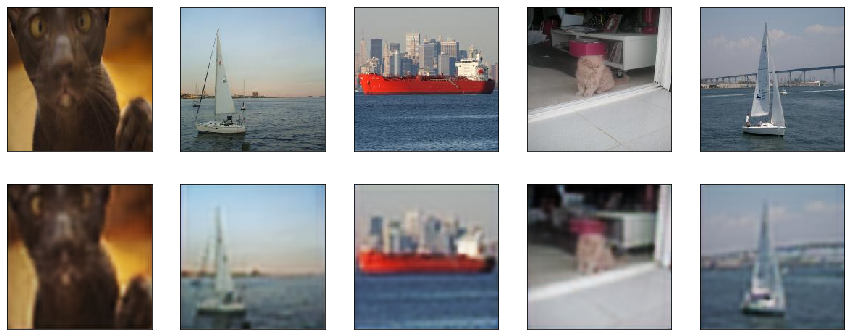

In [24]:
(model,history)=loadModel('twoClassLarge')
showHistory(history)
print(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

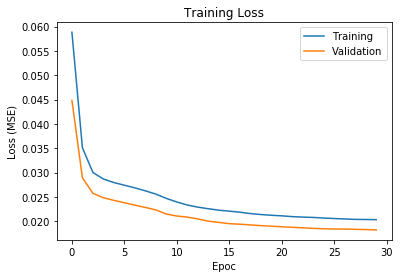

{'loss': [0.058824791128818804, 0.0351125532331375, 0.03003414597075719, 0.028695909277750897, 0.027963027759240224, 0.02742258972273423, 0.02687287920942673, 0.026266093208239628, 0.02559811601845118, 0.024708657826368625, 0.023973312888007896, 0.023350194555062515, 0.02291534896939993, 0.02259206033956546, 0.02229073251096102, 0.022097969957842276, 0.02188182993290516, 0.021600097947968886, 0.021401521405921532, 0.02124946707716355, 0.02113312755066615, 0.020970701913420972, 0.020873653917358473, 0.02080613751537525, 0.020684394469627967, 0.02057871180944718, 0.02049227348313882, 0.020404633048635264, 0.020381622976408553, 0.02034969818420135], 'binary_crossentropy': [0.65826637, 0.6070362, 0.5952561, 0.59191257, 0.5900526, 0.58875495, 0.58742124, 0.58598477, 0.5844501, 0.5823838, 0.580685, 0.57917416, 0.578117, 0.57732904, 0.57660645, 0.5761233, 0.57556903, 0.57487214, 0.5743872, 0.5739974, 0.57370085, 0.5732963, 0.57303715, 0.5728653, 0.57254475, 0.57227355, 0.5720597, 0.5718255, 0

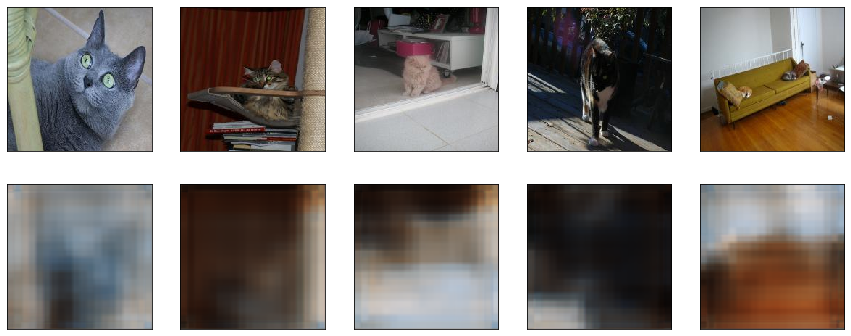

In [22]:
(model,history)=loadModel('twoClassSmall')
showHistory(history)
print(history)
decoded_images = evaluateModel(model)
showImages(decoded_images)

In [7]:
(model,history)=loadModel('twoClassSmall')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 200, 200, 3)       0         
_________________________________________________________________
enc_conv1 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
enc_max_pool1 (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
enc_conv2 (Conv2D)           (None, 100, 100, 16)      2320      
_________________________________________________________________
enc_max_pool2 (MaxPooling2D) (None, 20, 20, 16)        0         
_________________________________________________________________
enc_conv3 (Conv2D)           (None, 20, 

In [8]:
(model,history)=loadModel('twoClassTest')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 200, 200, 3)       0         
_________________________________________________________________
enc_conv1 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
enc_max_pool1 (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
enc_conv2 (Conv2D)           (None, 100, 100, 8)       1160      
_________________________________________________________________
enc_max_pool2 (MaxPooling2D) (None, 50, 50, 8)         0         
_________________________________________________________________
enc_conv3 (Conv2D)           (None, 50, 50, 8)         584       
_________________________________________________________________
enc_max_pool3 (MaxPooling2D) (None, 25, 25, 8)         0         
__________

In [9]:
(model,history)=loadModel('twoClassLarge')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 200, 200, 3)       0         
_________________________________________________________________
enc_conv1 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
enc_conv2 (Conv2D)           (None, 200, 200, 16)      2320      
_________________________________________________________________
enc_max_pool1 (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
enc_conv3 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
enc_max_pool2 (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
dec_up_samp1 (UpSampling2D)  (None, 50, 50, 16)        0         
__________